In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### 자연관광지 정규화

In [2]:
nature = pd.read_excel('data_format_자연관광지 면적 총합.xlsx')
nature.head(2)

,sido_code,sigun_code,sido,sigun,국립공원 면적,도립공원 면적,군립공원 면적,자연휴양림 면적,자연명승지 면적,시군구 면적,비율,정규화,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,11,11010,서울특별시,종로구,4.998,0.0,0.0,0.0,3.648988,23.913172,0.361599,0.246234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,11020,서울특별시,중구,0.000,0.0,0.0,0.0,0.000000,9.960308,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 필요없는 컬럼 없애기
nature = nature.drop(['정규화','Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],1)
nature.head(2)

,sido_code,sigun_code,sido,sigun,국립공원 면적,도립공원 면적,군립공원 면적,자연휴양림 면적,자연명승지 면적,시군구 면적,비율
0,11,11010,서울특별시,종로구,4.998,0.0,0.0,0.0,3.648988,23.913172,0.361599
1,11,11020,서울특별시,중구,0.000,0.0,0.0,0.0,0.000000,9.960308,0.000000


In [4]:
# 지역명 컬럼 만들기
cols = ['sido', 'sigun']
nature['지역명'] = nature[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
nature.head()

,sido_code,sigun_code,sido,sigun,국립공원 면적,도립공원 면적,군립공원 면적,자연휴양림 면적,자연명승지 면적,시군구 면적,비율,지역명
0,11,11010,서울특별시,종로구,4.998,0.0,0.0,0.0,3.648988,23.913172,0.361599,서울특별시 종로구
1,11,11020,서울특별시,중구,0.000,0.0,0.0,0.0,0.000000,9.960308,0.000000,서울특별시 중구
2,11,11030,서울특별시,용산구,0.000,0.0,0.0,0.0,0.000000,21.866145,0.000000,서울특별시 용산구
3,11,11040,서울특별시,성동구,0.000,0.0,0.0,0.0,0.000000,16.861004,0.000000,서울특별시 성동구
4,11,11050,서울특별시,광진구,0.000,0.0,0.0,0.0,0.000000,17.062940,0.000000,서울특별시 광진구


In [5]:
# 국립공원, 도립공원, 군립공원, 자연휴양림, 자연명승지 면적 합 만들기
nature['공원_휴양림_명승지 면적 합'] = nature['국립공원 면적'] + nature['도립공원 면적'] + nature['군립공원 면적'] + nature['자연휴양림 면적'] + nature['자연명승지 면적']
nature.head()

,sido_code,sigun_code,sido,sigun,국립공원 면적,도립공원 면적,군립공원 면적,자연휴양림 면적,자연명승지 면적,시군구 면적,비율,지역명,공원_휴양림_명승지 면적 합
0,11,11010,서울특별시,종로구,4.998,0.0,0.0,0.0,3.648988,23.913172,0.361599,서울특별시 종로구,8.646988
1,11,11020,서울특별시,중구,0.000,0.0,0.0,0.0,0.000000,9.960308,0.000000,서울특별시 중구,0.000000
2,11,11030,서울특별시,용산구,0.000,0.0,0.0,0.0,0.000000,21.866145,0.000000,서울특별시 용산구,0.000000
3,11,11040,서울특별시,성동구,0.000,0.0,0.0,0.0,0.000000,16.861004,0.000000,서울특별시 성동구,0.000000
4,11,11050,서울특별시,광진구,0.000,0.0,0.0,0.0,0.000000,17.062940,0.000000,서울특별시 광진구,0.000000


In [6]:
# 원하는 순서대로 컬럼 재배치
nature.columns

Index(['sido_code', 'sigun_code', 'sido', 'sigun', '국립공원 면적', '도립공원 면적',
       '군립공원 면적', '자연휴양림 면적', '자연명승지 면적', '시군구 면적', '비율', '지역명',
       '공원_휴양림_명승지 면적 합'],
      dtype='object')

In [7]:
nature = nature[['sido_code', 'sigun_code', 'sido', 'sigun', '지역명', '국립공원 면적', '도립공원 면적',
       '군립공원 면적', '자연휴양림 면적', '자연명승지 면적', '공원_휴양림_명승지 면적 합', '시군구 면적', '비율']]
nature.head()

,sido_code,sigun_code,sido,sigun,지역명,국립공원 면적,도립공원 면적,군립공원 면적,자연휴양림 면적,자연명승지 면적,공원_휴양림_명승지 면적 합,시군구 면적,비율
0,11,11010,서울특별시,종로구,서울특별시 종로구,4.998,0.0,0.0,0.0,3.648988,8.646988,23.913172,0.361599
1,11,11020,서울특별시,중구,서울특별시 중구,0.000,0.0,0.0,0.0,0.000000,0.000000,9.960308,0.000000
2,11,11030,서울특별시,용산구,서울특별시 용산구,0.000,0.0,0.0,0.0,0.000000,0.000000,21.866145,0.000000
3,11,11040,서울특별시,성동구,서울특별시 성동구,0.000,0.0,0.0,0.0,0.000000,0.000000,16.861004,0.000000
4,11,11050,서울특별시,광진구,서울특별시 광진구,0.000,0.0,0.0,0.0,0.000000,0.000000,17.062940,0.000000


In [8]:
nature = nature.drop(['sido_code', 'sigun_code', 'sido', 'sigun','국립공원 면적', '도립공원 면적',
       '군립공원 면적', '자연휴양림 면적', '자연명승지 면적'],1)
nature.head(2)

,지역명,공원_휴양림_명승지 면적 합,시군구 면적,비율
0,서울특별시 종로구,8.646988,23.913172,0.361599
1,서울특별시 중구,0.000000,9.960308,0.000000


In [9]:
nature['정규화'] = (nature['비율'] - nature['비율'].min()) / ( nature['비율'].max() - nature['비율'].min())
nature.head()

,지역명,공원_휴양림_명승지 면적 합,시군구 면적,비율,정규화
0,서울특별시 종로구,8.646988,23.913172,0.361599,0.246234
1,서울특별시 중구,0.000000,9.960308,0.000000,0.000000
2,서울특별시 용산구,0.000000,21.866145,0.000000,0.000000
3,서울특별시 성동구,0.000000,16.861004,0.000000,0.000000
4,서울특별시 광진구,0.000000,17.062940,0.000000,0.000000


### 지표 상관 행렬

In [29]:
index = pd.read_excel('진짜최종.xlsx')
index.head(2)

,Unnamed: 0,시도코드,시도명칭,시군구코드,시군구명칭2,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,...,위험성 지표,인프라 지표,위+인+관 지수,1일 방문자 정규화,순서정렬,지역명,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,0,11,서울특별시,11010,종로구,0.561973,0.535179,0.072467,0.154472,0.27853,...,0.548576,0.187925,7.757227,0.328,1,서울특별시 종로구,NaN,NaN,NaN,NaN
1,1,11,서울특별시,11020,중구,1.000000,0.689380,0.000879,0.195122,0.55268,...,0.844690,0.187170,7.161978,0.326,2,서울특별시 중구,NaN,NaN,NaN,NaN


In [30]:
index.columns

Index(['Unnamed: 0', '시도코드', '시도명칭', '시군구코드', '시군구명칭2',
       '시군구 인구 대비 평균 확진자 수 정규화 ', '시가지면적 대비 방문객 수 정규화', '전체 식당대비 안심식당 수 정규화',
       '교통안전성', '숙박안전성', '자연관광지 정규화', '검색량 정규화', '위험성 지표', '인프라 지표',
       '위+인+관 지수', '1일 방문자 정규화', '순서정렬', '지역명', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [31]:
# 필요없는 컬럼 제거
index = index.drop(['Unnamed: 0', '시도코드', '시도명칭', '시군구코드', '순서정렬', 'Unnamed: 18', 'Unnamed: 19','Unnamed: 20', 'Unnamed: 21'], 1)
index.head()

,시군구명칭2,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화,위험성 지표,인프라 지표,위+인+관 지수,1일 방문자 정규화,지역명
0,종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677,0.548576,0.187925,7.757227,0.328,서울특별시 종로구
1,중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677,0.844690,0.187170,7.161978,0.326,서울특별시 중구
2,용산구,0.450761,0.398645,0.058183,0.186992,0.36017,0.000000,0.102677,0.424703,0.151336,7.858617,0.246,서울특별시 용산구
3,성동구,0.338809,0.259935,0.000000,0.463415,0.15575,0.000000,0.102677,0.299372,0.154791,8.123098,0.150,서울특별시 성동구
4,광진구,0.373741,0.327115,0.103948,0.227642,0.31577,0.000000,0.102677,0.350428,0.161840,8.049182,0.179,서울특별시 광진구


In [32]:
index.columns

Index(['시군구명칭2', '시군구 인구 대비 평균 확진자 수 정규화 ', '시가지면적 대비 방문객 수 정규화',
       '전체 식당대비 안심식당 수 정규화', '교통안전성', '숙박안전성', '자연관광지 정규화', '검색량 정규화',
       '위험성 지표', '인프라 지표', '위+인+관 지수', '1일 방문자 정규화', '지역명'],
      dtype='object')

In [33]:
# 컬럼 순서 재배치
index = index[['시군구명칭2', '지역명', '시군구 인구 대비 평균 확진자 수 정규화 ', '시가지면적 대비 방문객 수 정규화', '전체 식당대비 안심식당 수 정규화',
       '교통안전성', '숙박안전성', '자연관광지 정규화', '검색량 정규화', '위험성 지표', '인프라 지표',
       '위+인+관 지수', '1일 방문자 정규화']]
index.head()

,시군구명칭2,지역명,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화,위험성 지표,인프라 지표,위+인+관 지수,1일 방문자 정규화
0,종로구,서울특별시 종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677,0.548576,0.187925,7.757227,0.328
1,중구,서울특별시 중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677,0.844690,0.187170,7.161978,0.326
2,용산구,서울특별시 용산구,0.450761,0.398645,0.058183,0.186992,0.36017,0.000000,0.102677,0.424703,0.151336,7.858617,0.246
3,성동구,서울특별시 성동구,0.338809,0.259935,0.000000,0.463415,0.15575,0.000000,0.102677,0.299372,0.154791,8.123098,0.150
4,광진구,서울특별시 광진구,0.373741,0.327115,0.103948,0.227642,0.31577,0.000000,0.102677,0.350428,0.161840,8.049182,0.179


In [34]:
# 한글 깨짐 없애기
### 위험한 곳 TOP 20 시각화
import matplotlib.pyplot as plt
import platform 
import matplotlib

# print(platform.system()) # 플랫폼 확인 

# Window 
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic') 
    
# 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False

In [16]:
corr = index[['지역명', '시군구 인구 대비 평균 확진자 수 정규화 ', '시가지면적 대비 방문객 수 정규화', '전체 식당대비 안심식당 수 정규화',
       '교통안전성', '숙박안전성', '자연관광지 정규화', '검색량 정규화']]
corr.head()

,지역명,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화
0,서울특별시 종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677
1,서울특별시 중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677
2,서울특별시 용산구,0.450761,0.398645,0.058183,0.186992,0.36017,0.000000,0.102677
3,서울특별시 성동구,0.338809,0.259935,0.000000,0.463415,0.15575,0.000000,0.102677
4,서울특별시 광진구,0.373741,0.327115,0.103948,0.227642,0.31577,0.000000,0.102677


In [131]:
# 기존 사용하는 용어로 이름 변경
corr = corr.rename(
    columns={
        '시군구 인구 대비 평균 확진자 수 정규화 ' : '코로나 위험도', 
        '시가지면적 대비 방문객 수 정규화' : '방문객 밀집도', 
        '전체 식당대비 안심식당 수 정규화' : '식당 안심도',
        '교통안전성':'교통 안심도', 
        '숙박안전성':'숙박 안심도', 
        '자연관광지 정규화':'야외관광 기회도', 
        '검색량 정규화':'온라인 관심도'
        
    }
)

corr.head(2)

,지역명,코로나 위험도,방문객 밀집도,식당 안심도,교통 안심도,숙박 안심도,야외관광 기회도,온라인 관심도
0,서울특별시 종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677
1,서울특별시 중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677


In [18]:
corr.columns

Index(['지역명', '코로나 위험도', '방문객 밀집도', '식당 안심도', '교통 안심도', '숙박안전성', '야외관광 기회도',
       '온라인 관심도'],
      dtype='object')

In [19]:
# # 시각화 모듈 임포트
# import matplotlib.pyplot as plt
# import seaborn as sns

# # jupyter notebook 내 그래프를 바로 그리기 위한 설정
# %matplotlib inline

# # unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
# plt.rcParams['axes.unicode_minus'] = False

# path = 'C:\Users\jai19\Downloads\NanumFontSetup_TTF_BARUNGOTHIC\NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=path, size=50).get_name()
# print(font_name)
# plt.rc('font', family=font_name)

# sns.pairplot(corr[['코로나 위험도', '방문객 밀집도', '식당 안심도', '교통 안심도', '숙박안전성', '야외관광 기회도',
#        '온라인 관심도']])

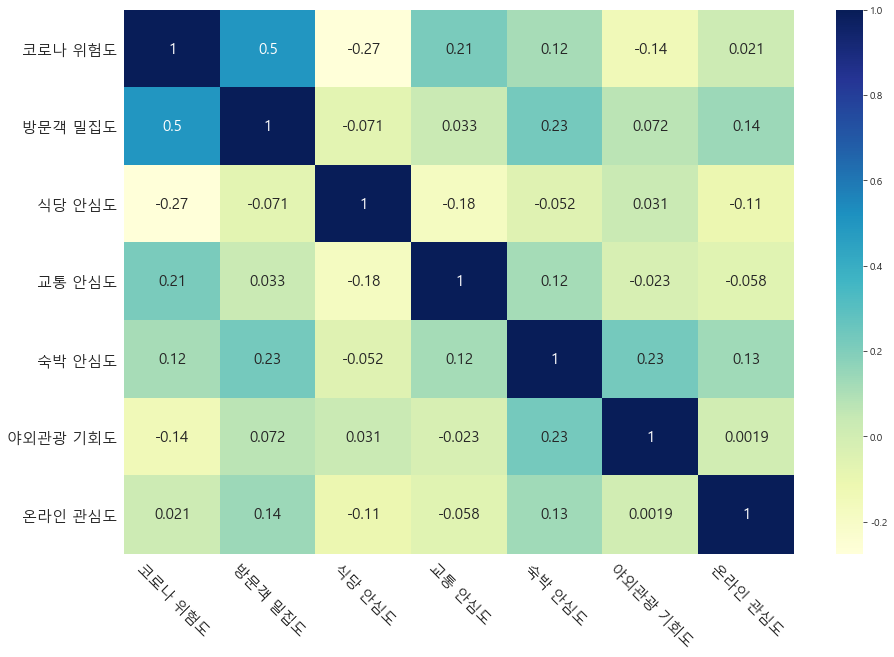

In [132]:
import seaborn as sns

# Window 
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic') 
    
# 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False
cor = corr.corr(method='pearson')


plt.figure(figsize=(15,10))
# sns.set(font_scale=1.3)
plt.xticks(fontsize = 15, rotation = -45)
plt.yticks(fontsize = 15)
sns.heatmap(cor, annot=True, annot_kws={"fontsize": 15}, cmap="YlGnBu")
plt.show()

### 지표 boxplot

In [107]:
index.head(2)

,시군구명칭2,지역명,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화,위험성 지표,인프라 지표,위+인+관 지수,1일 방문자 정규화
0,종로구,서울특별시 종로구,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677,0.548576,0.187925,7.757227,0.328
1,중구,서울특별시 중구,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677,0.844690,0.187170,7.161978,0.326


In [109]:
index.columns

Index(['시군구명칭2', '지역명', '시군구 인구 대비 평균 확진자 수 정규화 ', '시가지면적 대비 방문객 수 정규화',
       '전체 식당대비 안심식당 수 정규화', '교통안전성', '숙박안전성', '자연관광지 정규화', '검색량 정규화',
       '위험성 지표', '인프라 지표', '위+인+관 지수', '1일 방문자 정규화'],
      dtype='object')

In [112]:
# 필요없는 컬럼 제거
box = index.drop(['시군구명칭2', '지역명', '위험성 지표', '인프라 지표', '위+인+관 지수', '1일 방문자 정규화'],1)
box.head(2)

,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화
0,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677
1,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677


In [116]:
box.columns

Index(['시군구 인구 대비 평균 확진자 수 정규화 ', '시가지면적 대비 방문객 수 정규화', '전체 식당대비 안심식당 수 정규화',
       '교통안전성', '숙박안전성', '자연관광지 정규화', '검색량 정규화'],
      dtype='object')

In [127]:
# 용어 통일
box = box.rename(
    columns={
        '시군구 인구 대비 평균 확진자 수 정규화 ' : '코로나 위험도', 
        '시가지면적 대비 방문객 수 정규화' : '방문객 밀집도', 
        '전체 식당대비 안심식당 수 정규화' : '식당 안심도',
        '교통안전성':'교통 안심도', 
        '숙박안전성':'숙박 안심도', 
        '자연관광지 정규화':'야외관광 기회도', 
        '검색량 정규화':'온라인 관심도'
        
    }
)

box.head(2)

,코로나 위험도,방문객 밀집도,식당 안심도,교통 안심도,숙박 안심도,야외관광 기회도,온라인 관심도
0,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677
1,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677


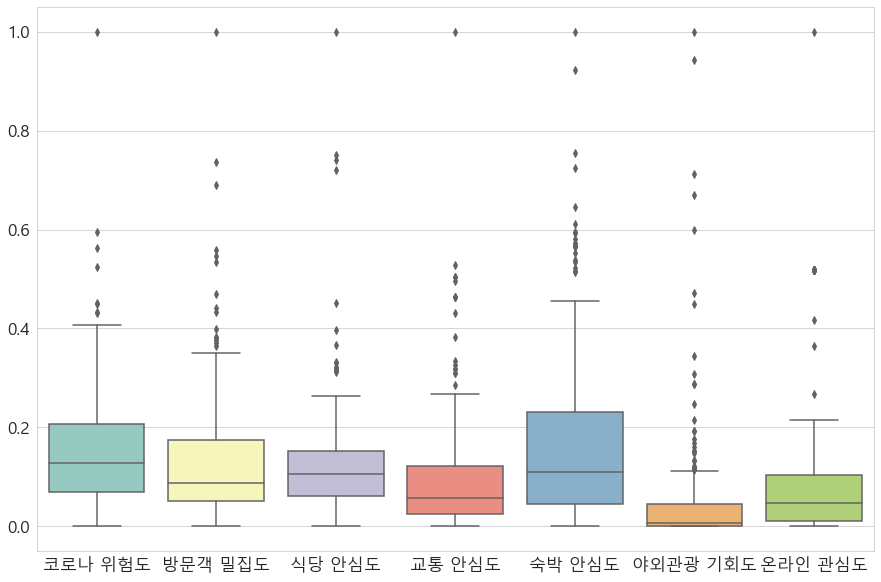

In [128]:
# 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np


# 화면 스타일 설정하기
sns.set_style("whitegrid")


#한글 깨짐 방지
# Window 
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else: #linux 
    matplotlib.rc('font', family='NanumGothic') 
    
# 그래프에 마이너스 표시가 되도록 변경 
matplotlib.rcParams['axes.unicode_minus'] = False



#boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=box,palette = "Set3")
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

#1.0 라벨링

### PCA

In [157]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

box.head()

,코로나 위험도,방문객 밀집도,식당 안심도,교통 안심도,숙박 안심도,야외관광 기회도,온라인 관심도
0,0.561973,0.535179,0.072467,0.154472,0.27853,0.246234,0.102677
1,1.000000,0.689380,0.000879,0.195122,0.55268,0.000000,0.102677
2,0.450761,0.398645,0.058183,0.186992,0.36017,0.000000,0.102677
3,0.338809,0.259935,0.000000,0.463415,0.15575,0.000000,0.102677
4,0.373741,0.327115,0.103948,0.227642,0.31577,0.000000,0.102677


In [164]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=7)
pca_fit = pca.fit(box)

# 주성분 분산합 출력
print(pca.explained_variance_ratio_)

[0.28984072 0.18698425 0.15597446 0.12287647 0.11063249 0.08496795
 0.04872366]


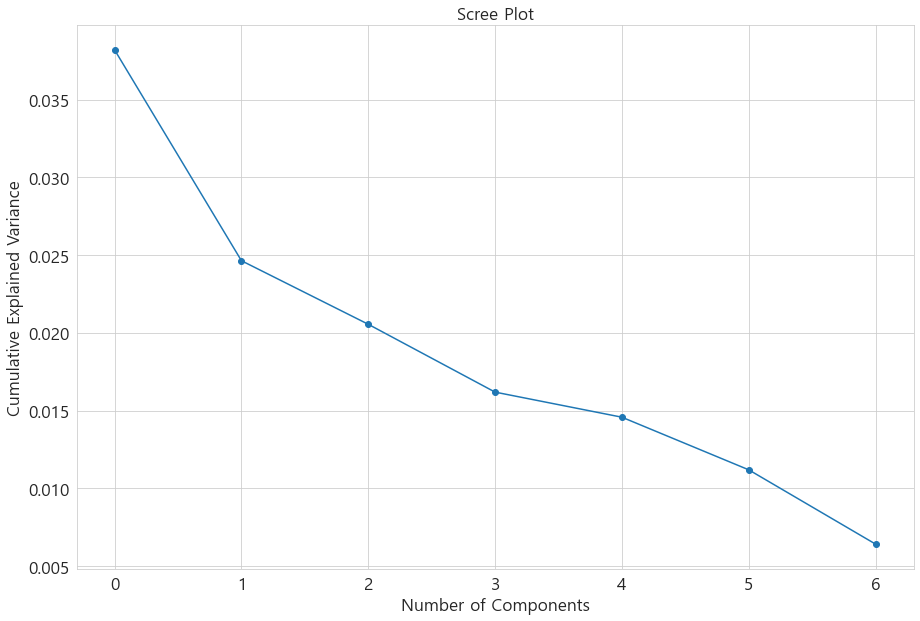

In [168]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Scree Plot', fontsize=17)
plt.xlabel('Number of Components', fontsize=17)
plt.ylabel('Cumulative Explained Variance', fontsize=17)
plt.plot(pca.explained_variance_, 'o-')

### 버블 차트 그리기

In [35]:
# 상위 top10
top = index.sort_values(by='위+인+관 지수', ascending=False)
top = top[top['위+인+관 지수'] > top['위+인+관 지수'].mean()+top['위+인+관 지수'].std()]
top.head(2)

,시군구명칭2,지역명,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화,위험성 지표,인프라 지표,위+인+관 지수,1일 방문자 정규화
165,여수시,전라남도 여수시,0.061082,0.006846,0.080257,0.308943,0.52311,0.598362,0.417249,0.033964,0.377668,9.859993,0.245
210,통영시,경상남도 통영시,0.043131,0.046634,0.119189,0.138211,0.72416,0.670021,0.157988,0.044883,0.412895,9.719804,0.131


In [36]:
# 컬럼 이름 변경 및 컬럼 추가
top10 = top.rename(
    columns={
        "위+인+관 지수" : "지수",
        "시군구명칭2" : "시군구명칭"
    }
)
top10.head(2)

,시군구명칭,지역명,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화,위험성 지표,인프라 지표,지수,1일 방문자 정규화
165,여수시,전라남도 여수시,0.061082,0.006846,0.080257,0.308943,0.52311,0.598362,0.417249,0.033964,0.377668,9.859993,0.245
210,통영시,경상남도 통영시,0.043131,0.046634,0.119189,0.138211,0.72416,0.670021,0.157988,0.044883,0.412895,9.719804,0.131


In [37]:
# 식당+교통+숙박 컬럼 만들기
top10['인프라'] = (top10['전체 식당대비 안심식당 수 정규화']+top10['교통안전성']+top10['숙박안전성']) / 3
top10.head()

,시군구명칭,지역명,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화,위험성 지표,인프라 지표,지수,1일 방문자 정규화,인프라
165,여수시,전라남도 여수시,0.061082,0.006846,0.080257,0.308943,0.52311,0.598362,0.417249,0.033964,0.377668,9.859993,0.245,0.304103
210,통영시,경상남도 통영시,0.043131,0.046634,0.119189,0.138211,0.72416,0.670021,0.157988,0.044883,0.412895,9.719804,0.131,0.327187
227,제주시,제주특별자치도 제주시,0.023590,0.077213,0.097016,1.000000,0.53536,0.148052,0.009709,0.050401,0.445107,9.689334,0.672,0.544125
184,진도군,전라남도 진도군,0.050877,0.067713,0.217172,0.008130,0.32015,0.942692,0.056213,0.059295,0.372036,9.425768,0.021,0.181817
208,울릉군,경상북도 울릉군,0.039431,0.065569,0.037157,0.032520,0.44329,0.000000,1.000000,0.052500,0.128242,9.407968,0.003,0.170989


In [38]:
# 1일 방문자 음수로 만들기
top10['1일 방문자 정규화'] = (top10['1일 방문자 정규화'])*(-1)
top10.head(2)

,시군구명칭,지역명,시군구 인구 대비 평균 확진자 수 정규화,시가지면적 대비 방문객 수 정규화,전체 식당대비 안심식당 수 정규화,교통안전성,숙박안전성,자연관광지 정규화,검색량 정규화,위험성 지표,인프라 지표,지수,1일 방문자 정규화,인프라
165,여수시,전라남도 여수시,0.061082,0.006846,0.080257,0.308943,0.52311,0.598362,0.417249,0.033964,0.377668,9.859993,-0.245,0.304103
210,통영시,경상남도 통영시,0.043131,0.046634,0.119189,0.138211,0.72416,0.670021,0.157988,0.044883,0.412895,9.719804,-0.131,0.327187


In [81]:
#자연, 인프라
import plotly.express as px
import plotly

fig = px.scatter(top10, x='인프라', 
                 y='자연관광지 정규화',
                 color='1일 방문자 정규화', 
                 size='지수', 
                 text='시군구명칭',
                 opacity=0.4,
                 title='인프라-자연 그래프',
                 size_max=20)
fig.show()
# fig.update_xaxes(rangeslider_visible=True) #x축 범위 스크롤을 통해 이동 가능
# plotly.offline.plot(fig, filename='‪scatter.html')

In [129]:
#인프라, 레어
import plotly.express as px
import plotly

fig = px.scatter(top10, x='인프라', 
                 y='1일 방문자 정규화', 
                 color='자연관광지 정규화',
                 size='지수', 
                 text='시군구명칭',
                 opacity=0.4,#투명도
                 title='인프라-1일 방문자 그래프',
                 size_max=20)
fig.show()

# plotly.offline.plot(fig, filename='‪scatter_rare.html')



In [130]:
# 레어, 자연
import plotly.express as px
import plotly.graph_objects as go
import plotly



fig = px.scatter(top10, x='자연관광지 정규화', 
                 y='1일 방문자 정규화', 
                 color='인프라',
                 size='지수', 
                 text='시군구명칭', 
                 opacity=0.4,
                 title='자연-1일 관광지 그래프',
                 size_max=20)
fig.show()

# plotly.offline.plot(fig, filename='‪scatter_out_rare.html')